In [19]:
# Importando o dataset iris para estudo
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

# Selecionando apenas as colunas de pétala
X = X.loc[:, ["petal length (cm)", "petal width (cm)"]]

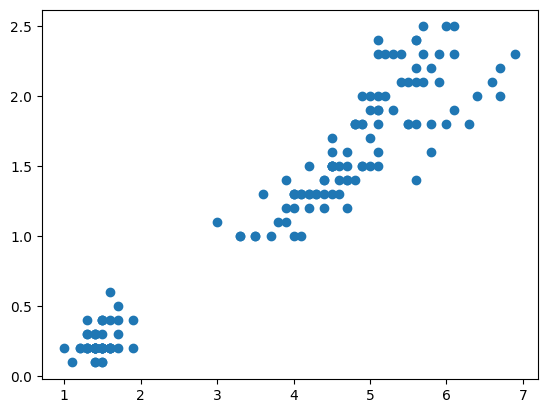

In [20]:
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X["petal length (cm)"], X["petal width (cm)"])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Utilizando o algoritmo

# Alterando a quantidade de clusters, vai definir a quantidade de labels!
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [22]:
# Verificando labels determinadas no KMeans
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

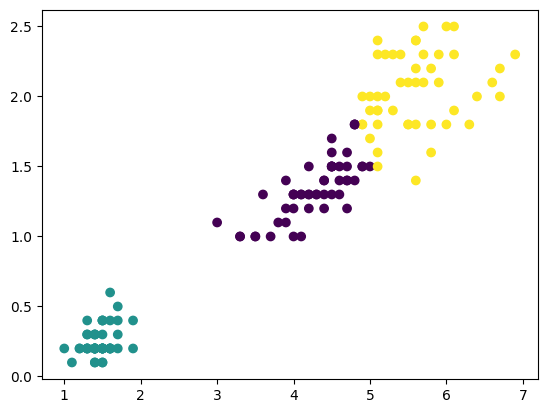

In [23]:
fig, ax = plt.subplots()
                                                          # Definindo a cor pra cada label
ax.scatter(X["petal length (cm)"], X["petal width (cm)"], c=kmeans.labels_)
plt.show()

# Lembrando que isso não é a classificação, ele apenas AGRUPOU e ROTULOU